# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

#### 1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
previsao_de_renda = 'https://raw.githubusercontent.com/Jefersonfranca/Analise_descritiva_identificando_outliers/main/previsao_de_renda.csv'
df = pd.read_csv(previsao_de_renda)

df = df.drop(columns='Unnamed: 0').set_index(keys='index', drop=True)
df.drop_duplicates(inplace=True)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16065,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,False,3018.59
3678,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
3405,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18


In [6]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [14]:
# Verificando variáveis qualitativas:

df.select_dtypes(include=['object', 'boolean']).columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'mau'],
      dtype='object')

In [15]:
qualitativas = df.select_dtypes(include=['object', 'boolean']).columns

print(df[qualitativas].info())
df[qualitativas]

<class 'pandas.core.frame.DataFrame'>
Index: 14547 entries, 8682 to 12895
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sexo              14547 non-null  object
 1   posse_de_veiculo  14547 non-null  bool  
 2   posse_de_imovel   14547 non-null  bool  
 3   tipo_renda        14547 non-null  object
 4   educacao          14547 non-null  object
 5   estado_civil      14547 non-null  object
 6   tipo_residencia   14547 non-null  object
 7   mau               14547 non-null  bool  
dtypes: bool(3), object(5)
memory usage: 724.5+ KB
None


,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
index,,,,,,,,
8682,F,False,True,Assalariado,Secundário,Casado,Casa,False
12830,M,True,True,Empresário,Secundário,Casado,Casa,False
2885,M,True,True,Assalariado,Superior completo,Casado,Casa,False
16168,F,True,False,Empresário,Secundário,Casado,Casa,False
12438,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...
16065,M,True,True,Assalariado,Secundário,Casado,Casa,False
3678,M,True,True,Assalariado,Secundário,Casado,Casa,False
3405,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False


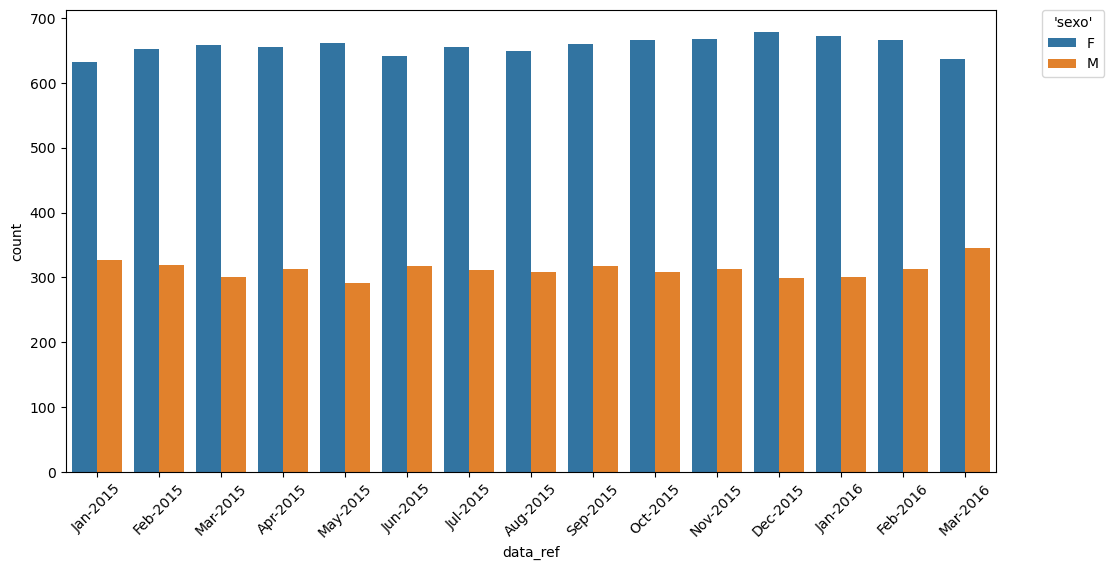

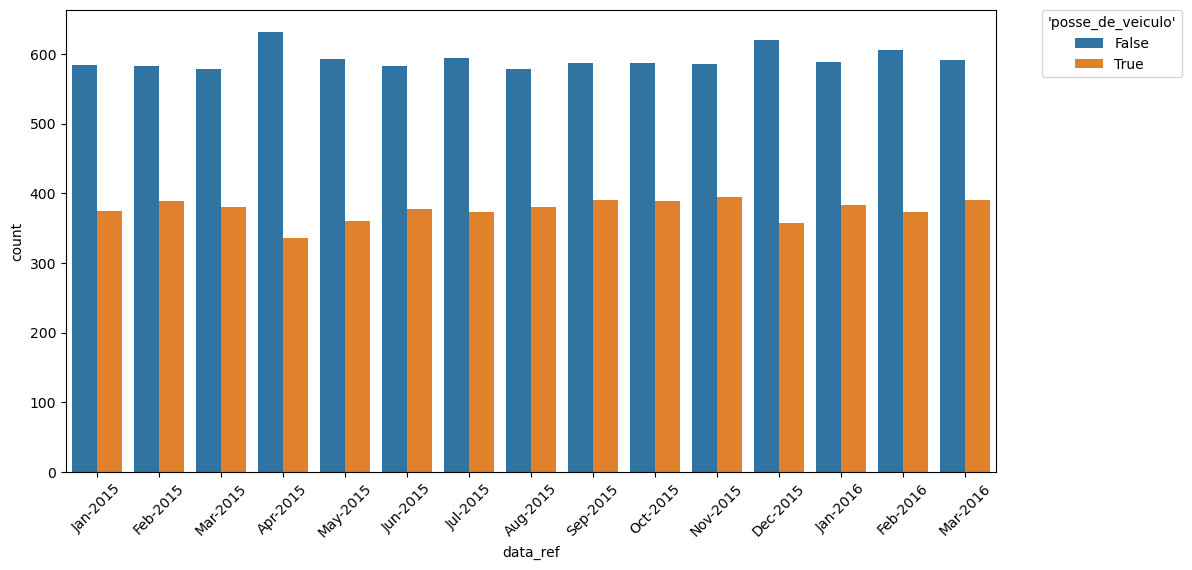

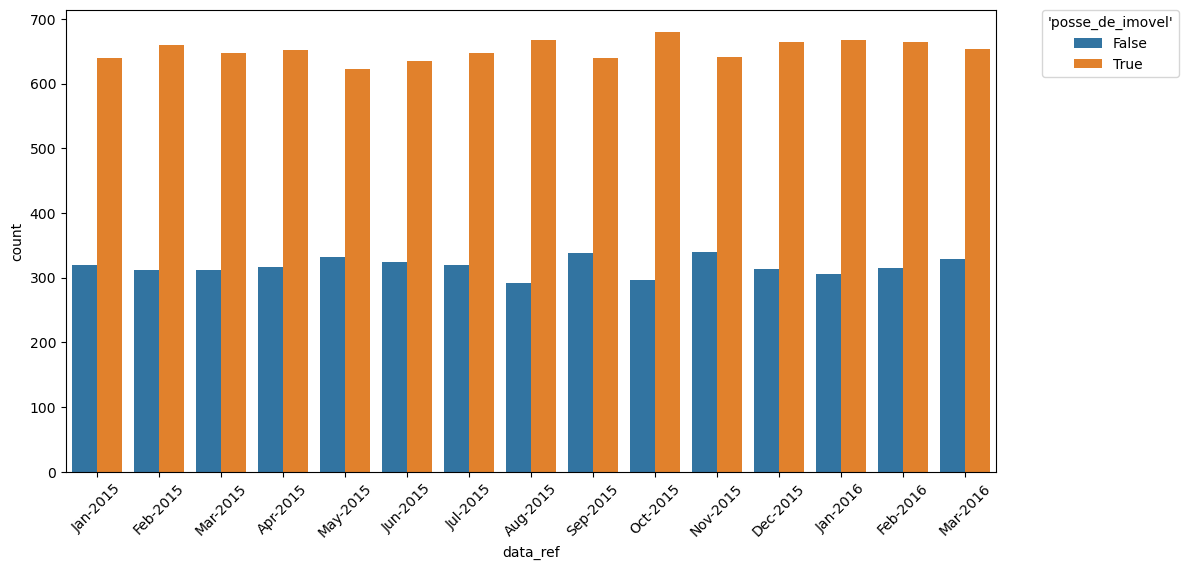

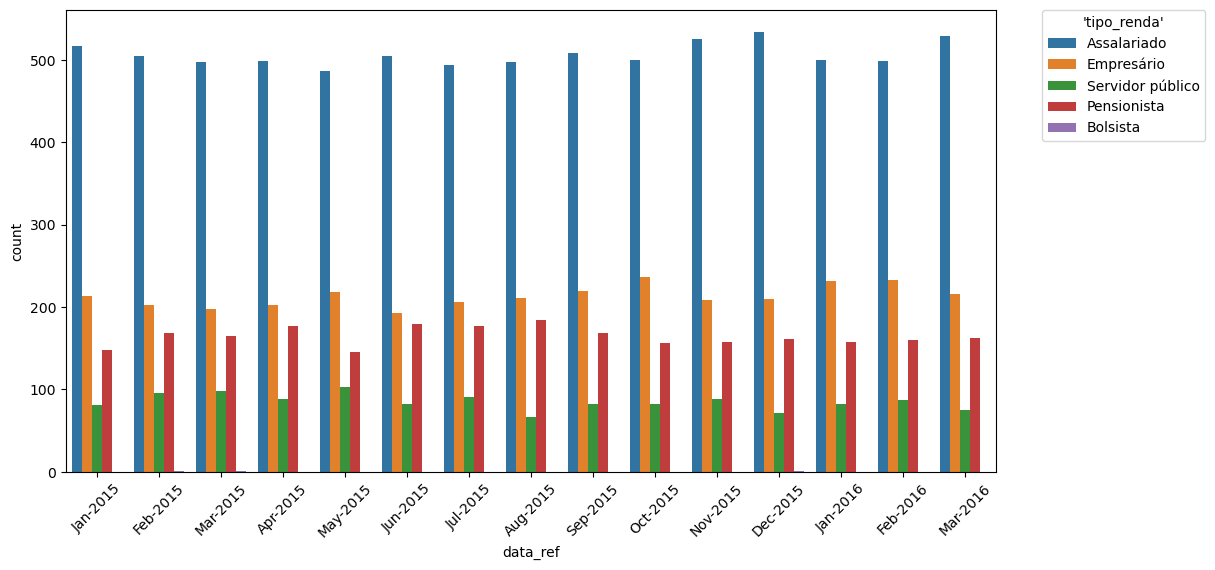

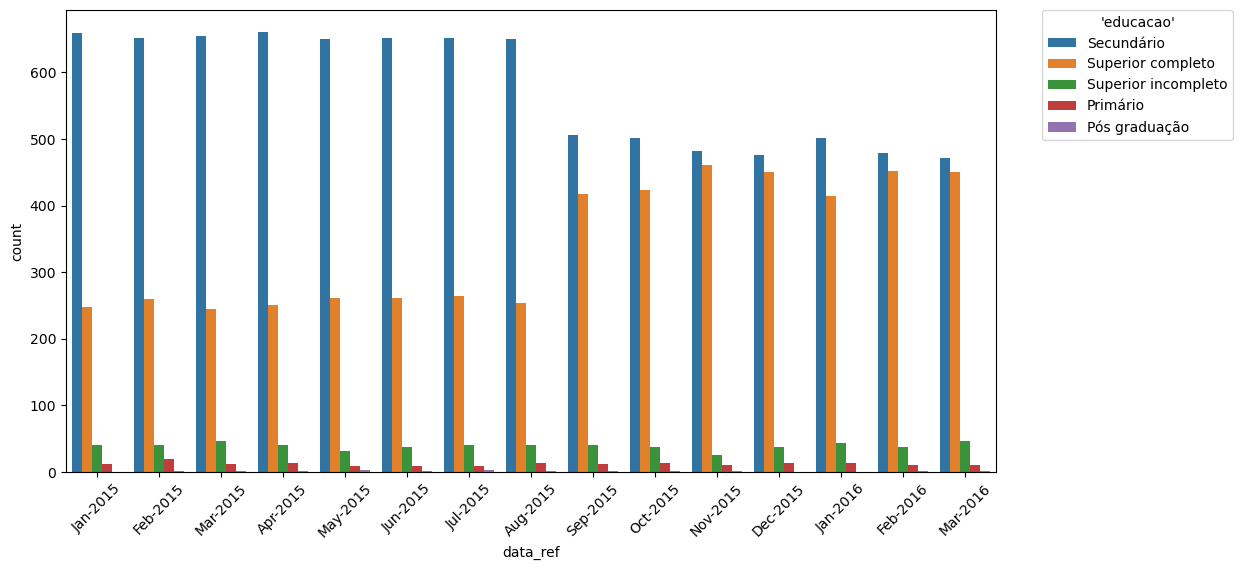

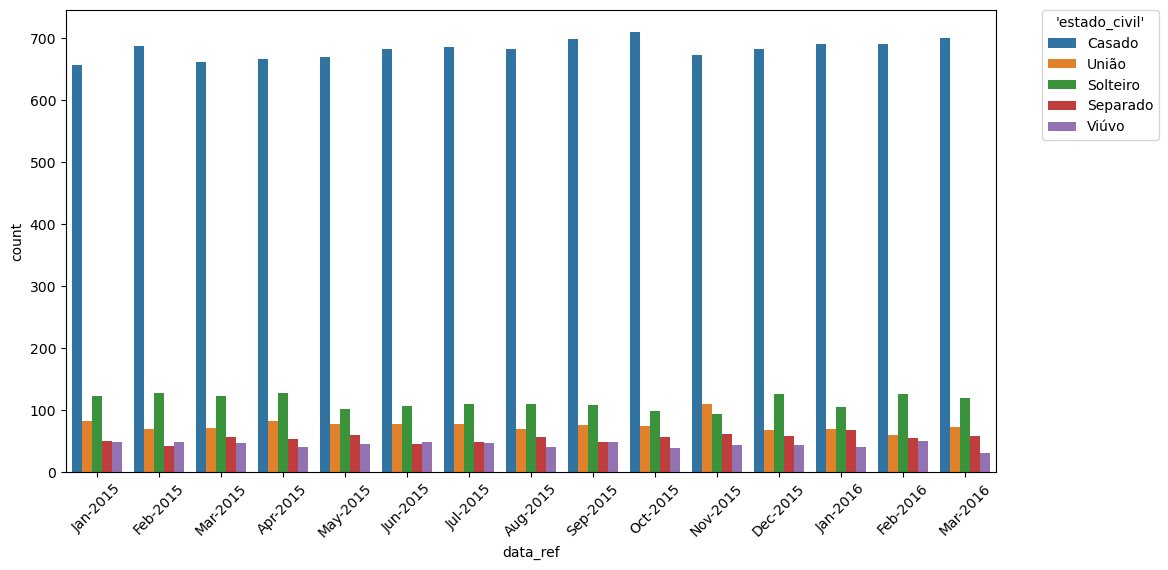

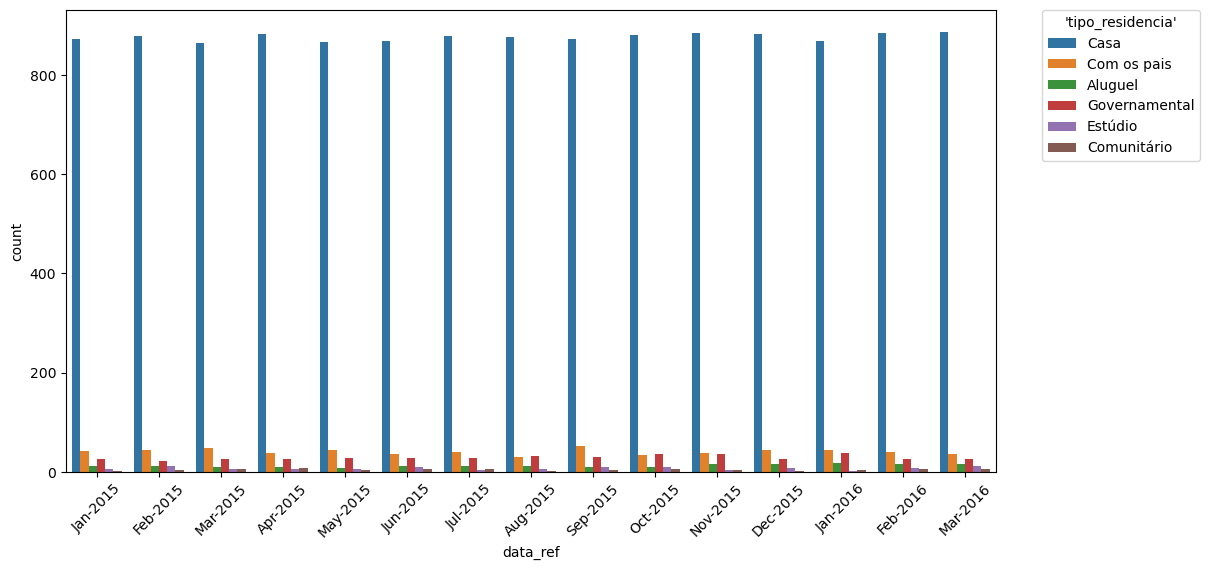

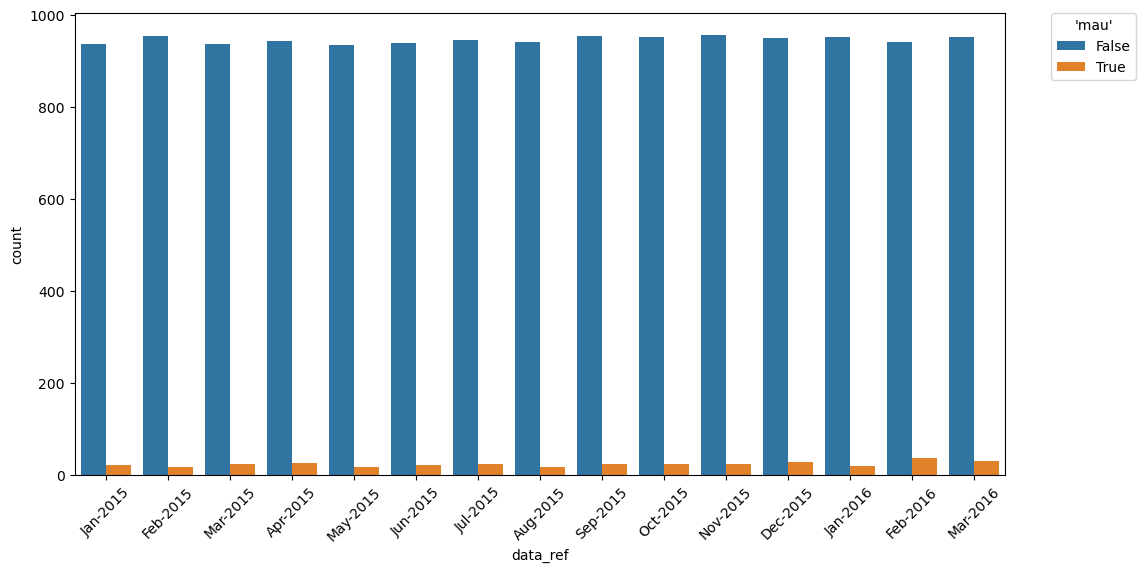

In [41]:
plt.rc('figure', figsize=(12,6))

for col in qualitativas:
    ax = sns.countplot(x='data_ref',  hue = col, data=df)
    
    data_labs = df['data_ref'].map(lambda x: x.strftime("%b-%Y")).unique()
    ax.set_xticks(list(range(df['data_ref'].nunique())))
    ax.set_xticklabels(data_labs, rotation=45)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f"'{col}'")
    
    plt.show()

Podemos observar que dentre todos os gráficos apresentados, a variável qualitativa que se destaca é a **educação**. A partir de setembro de 2015, houve um aumento significativo na quantidade de dados com escolaridade de ensino superior completo, enquanto a quantidade de dados com **educação secundária** diminuiu. Essa mudança na distribuição dos dados foi mantida até o final do período analisado. Investigar as razões por trás dessa mudança pode fornecer insights valiosos.

### 2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

sexo               F         M
data_ref                      
2015-01-01  0.659020  0.340980
2015-02-01  0.671811  0.328189
2015-03-01  0.686458  0.313542
2015-04-01  0.676653  0.323347
2015-05-01  0.693920  0.306080
2015-06-01  0.668750  0.331250
2015-07-01  0.677686  0.322314
2015-08-01  0.677789  0.322211
2015-09-01  0.674847  0.325153
2015-10-01  0.683402  0.316598
2015-11-01  0.680938  0.319062
2015-12-01  0.694274  0.305726
2016-01-01  0.690647  0.309353
2016-02-01  0.680286  0.319714
2016-03-01  0.648676  0.351324



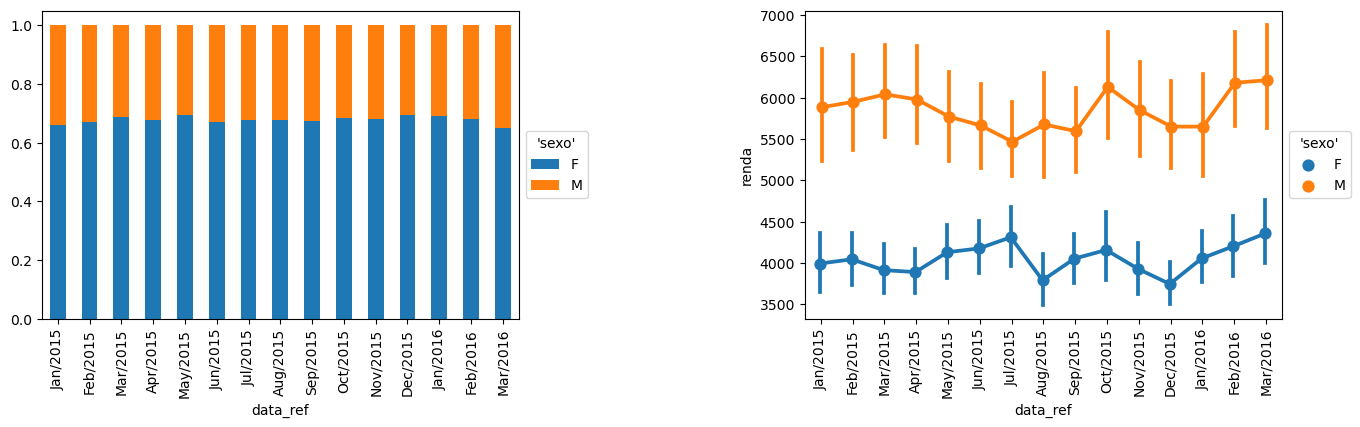

posse_de_veiculo     False     True 
data_ref                            
2015-01-01        0.608968  0.391032
2015-02-01        0.599794  0.400206
2015-03-01        0.603125  0.396875
2015-04-01        0.652893  0.347107
2015-05-01        0.621593  0.378407
2015-06-01        0.607292  0.392708
2015-07-01        0.614669  0.385331
2015-08-01        0.602711  0.397289
2015-09-01        0.600204  0.399796
2015-10-01        0.601434  0.398566
2015-11-01        0.597350  0.402650
2015-12-01        0.634969  0.365031
2016-01-01        0.605344  0.394656
2016-02-01        0.618999  0.381001
2016-03-01        0.602851  0.397149



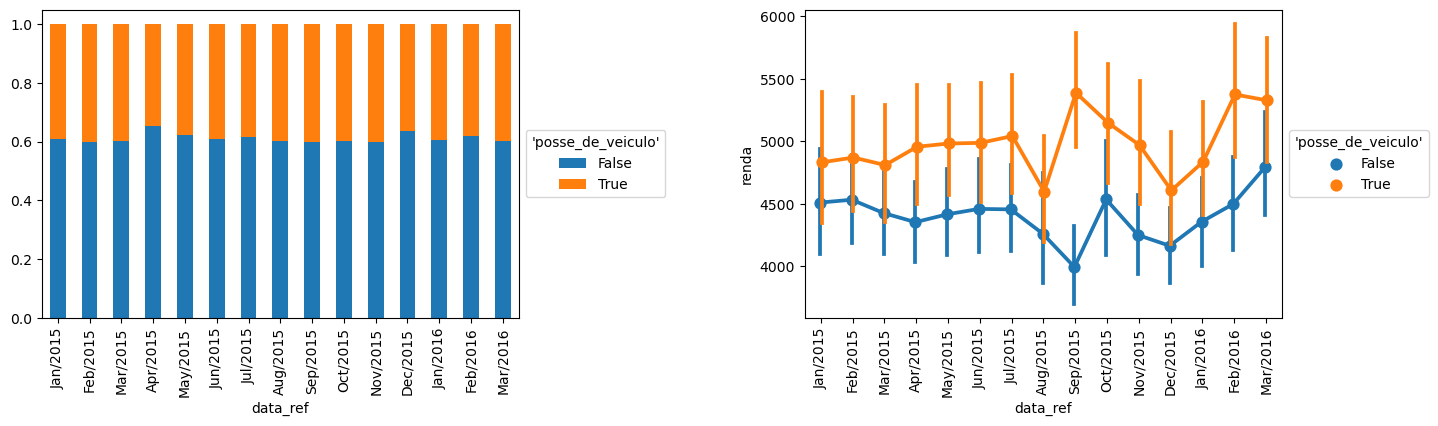

posse_de_imovel     False     True 
data_ref                           
2015-01-01       0.333681  0.666319
2015-02-01       0.320988  0.679012
2015-03-01       0.325000  0.675000
2015-04-01       0.326446  0.673554
2015-05-01       0.348008  0.651992
2015-06-01       0.338542  0.661458
2015-07-01       0.330579  0.669421
2015-08-01       0.304484  0.695516
2015-09-01       0.346626  0.653374
2015-10-01       0.303279  0.696721
2015-11-01       0.346585  0.653415
2015-12-01       0.320041  0.679959
2016-01-01       0.314491  0.685509
2016-02-01       0.321757  0.678243
2016-03-01       0.335031  0.664969



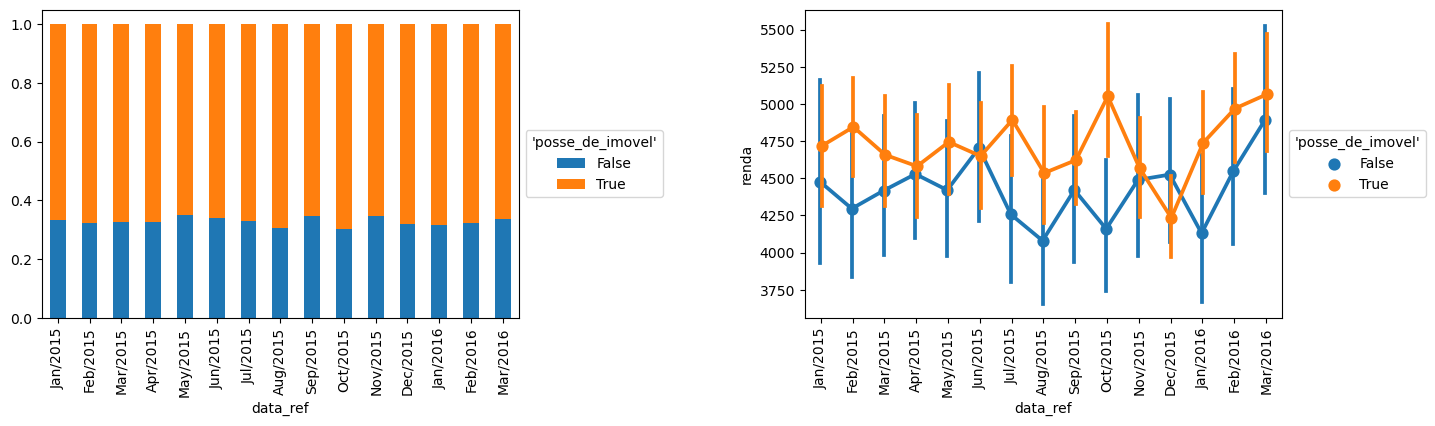

tipo_renda  Assalariado  Bolsista  Empresário  Pensionista  Servidor público
data_ref                                                                    
2015-01-01     0.539103  0.000000    0.222106     0.154327          0.084463
2015-02-01     0.519547  0.001029    0.207819     0.172840          0.098765
2015-03-01     0.518750  0.001042    0.206250     0.171875          0.102083
2015-04-01     0.515496  0.000000    0.209711     0.182851          0.091942
2015-05-01     0.510482  0.000000    0.228512     0.153040          0.107966
2015-06-01     0.526042  0.000000    0.201042     0.186458          0.086458
2015-07-01     0.510331  0.000000    0.212810     0.182851          0.094008
2015-08-01     0.518248  0.000000    0.220021     0.191867          0.069864
2015-09-01     0.519427  0.000000    0.223926     0.172802          0.083845
2015-10-01     0.512295  0.000000    0.242828     0.160861          0.084016
2015-11-01     0.535168  0.000000    0.213048     0.161060          0.090724

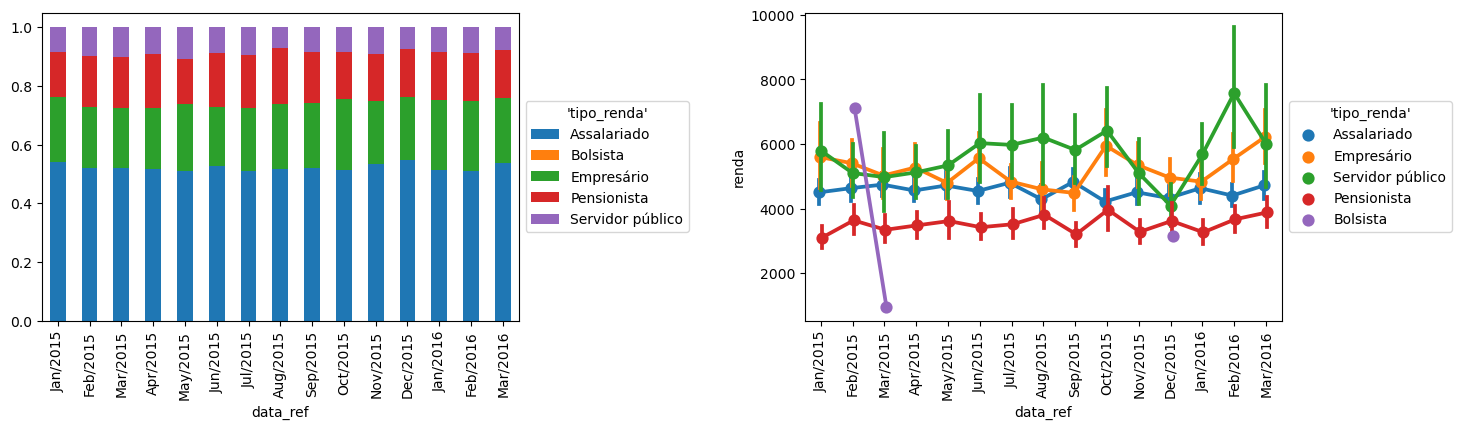

educacao    Primário  Pós graduação  Secundário  Superior completo  \
data_ref                                                             
2015-01-01  0.012513       0.000000    0.687174           0.257560   
2015-02-01  0.020576       0.001029    0.670782           0.266461   
2015-03-01  0.012500       0.002083    0.682292           0.255208   
2015-04-01  0.014463       0.001033    0.682851           0.259298   
2015-05-01  0.009434       0.003145    0.681342           0.273585   
2015-06-01  0.009375       0.001042    0.679167           0.271875   
2015-07-01  0.009298       0.003099    0.673554           0.272727   
2015-08-01  0.014599       0.001043    0.677789           0.263816   
2015-09-01  0.012270       0.001022    0.517382           0.427403   
2015-10-01  0.013320       0.001025    0.513320           0.434426   
2015-11-01  0.011213       0.001019    0.491335           0.469929   
2015-12-01  0.014315       0.000000    0.486708           0.460123   
2016-01-01  0.013361

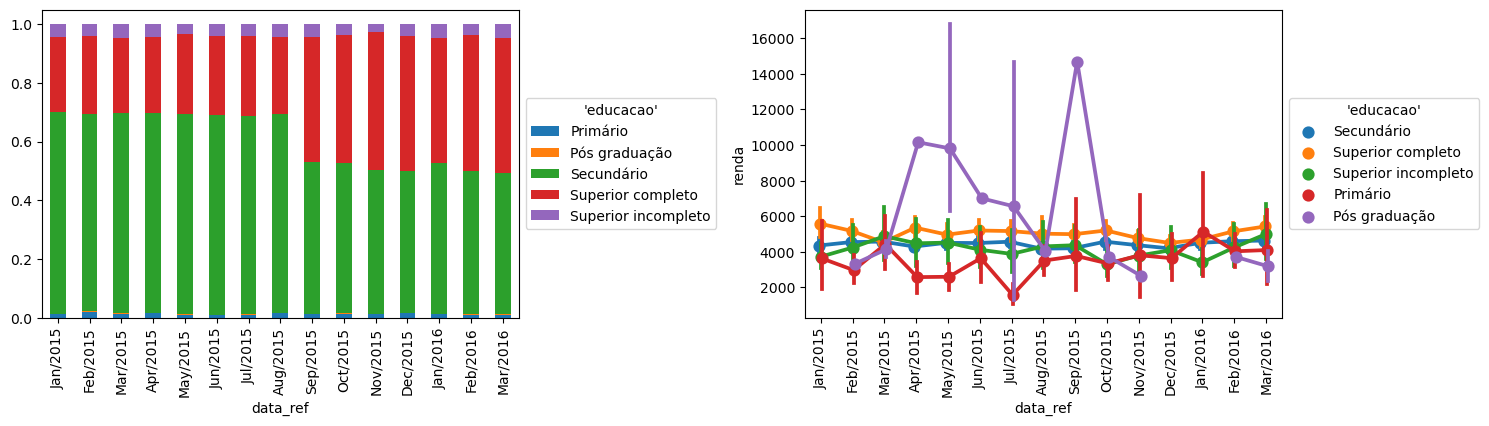

estado_civil    Casado  Separado  Solteiro     União     Viúvo
data_ref                                                      
2015-01-01    0.685089  0.052138  0.127216  0.085506  0.050052
2015-02-01    0.706790  0.042181  0.130658  0.070988  0.049383
2015-03-01    0.689583  0.059375  0.128125  0.073958  0.048958
2015-04-01    0.688017  0.054752  0.131198  0.084711  0.041322
2015-05-01    0.702306  0.061845  0.106918  0.081761  0.047170
2015-06-01    0.711458  0.046875  0.111458  0.080208  0.050000
2015-07-01    0.707645  0.050620  0.113636  0.080579  0.047521
2015-08-01    0.712200  0.059437  0.113660  0.072993  0.041710
2015-09-01    0.713701  0.049080  0.110429  0.077710  0.049080
2015-10-01    0.727459  0.057377  0.100410  0.075820  0.038934
2015-11-01    0.686035  0.062181  0.095821  0.111111  0.044852
2015-12-01    0.698364  0.059305  0.128834  0.069530  0.043967
2016-01-01    0.710175  0.068859  0.107914  0.071942  0.041110
2016-02-01    0.704801  0.056180  0.127681  0.060266  0

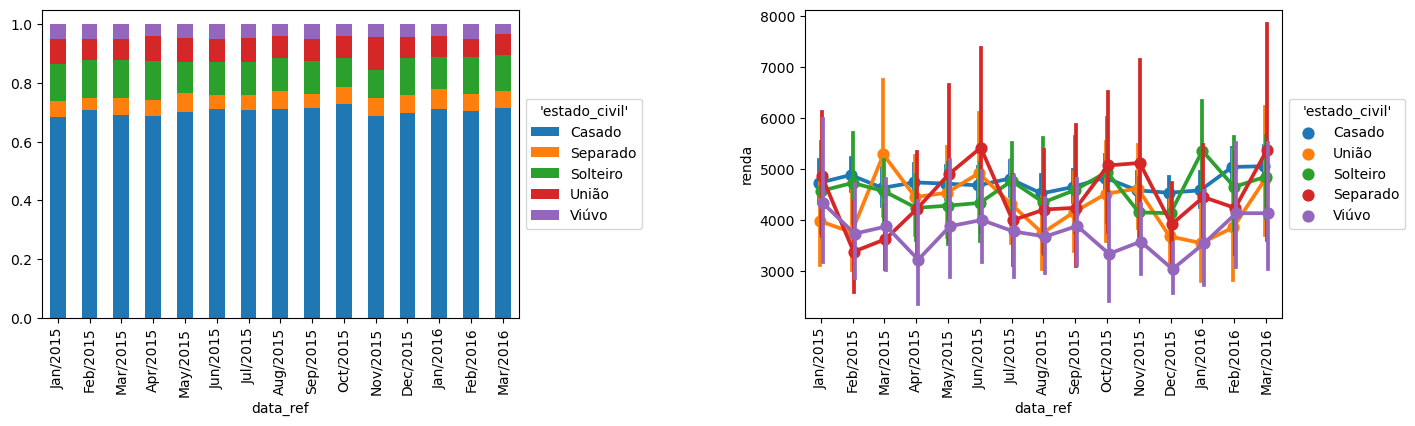

tipo_residencia   Aluguel      Casa  Com os pais  Comunitário   Estúdio  \
data_ref                                                                  
2015-01-01       0.011470  0.910323     0.043796     0.001043  0.006257   
2015-02-01       0.012346  0.903292     0.046296     0.004115  0.012346   
2015-03-01       0.010417  0.901042     0.051042     0.005208  0.005208   
2015-04-01       0.009298  0.911157     0.039256     0.007231  0.006198   
2015-05-01       0.007338  0.907757     0.047170     0.004193  0.005241   
2015-06-01       0.011458  0.905208     0.038542     0.005208  0.010417   
2015-07-01       0.012397  0.908058     0.042355     0.006198  0.003099   
2015-08-01       0.011470  0.914494     0.032325     0.002086  0.006257   
2015-09-01       0.010225  0.891616     0.053170     0.004090  0.010225   
2015-10-01       0.010246  0.901639     0.035861     0.005123  0.009221   
2015-11-01       0.015291  0.901121     0.039755     0.003058  0.003058   
2015-12-01       0.015337

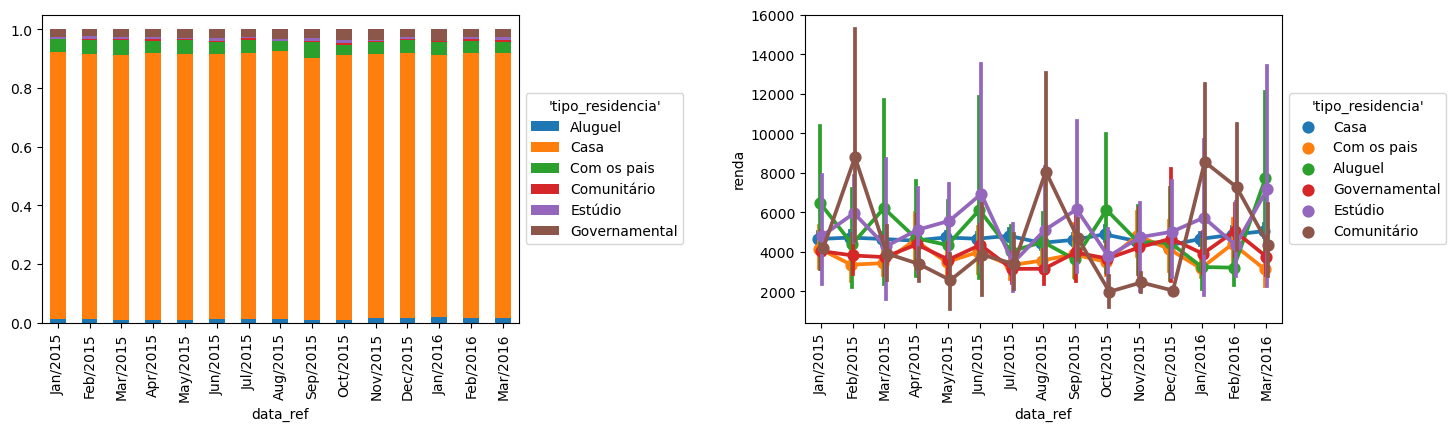

mau            False     True 
data_ref                      
2015-01-01  0.978102  0.021898
2015-02-01  0.982510  0.017490
2015-03-01  0.976042  0.023958
2015-04-01  0.974174  0.025826
2015-05-01  0.981132  0.018868
2015-06-01  0.978125  0.021875
2015-07-01  0.976240  0.023760
2015-08-01  0.981230  0.018770
2015-09-01  0.976483  0.023517
2015-10-01  0.976434  0.023566
2015-11-01  0.975535  0.024465
2015-12-01  0.972393  0.027607
2016-01-01  0.979445  0.020555
2016-02-01  0.962206  0.037794
2016-03-01  0.969450  0.030550



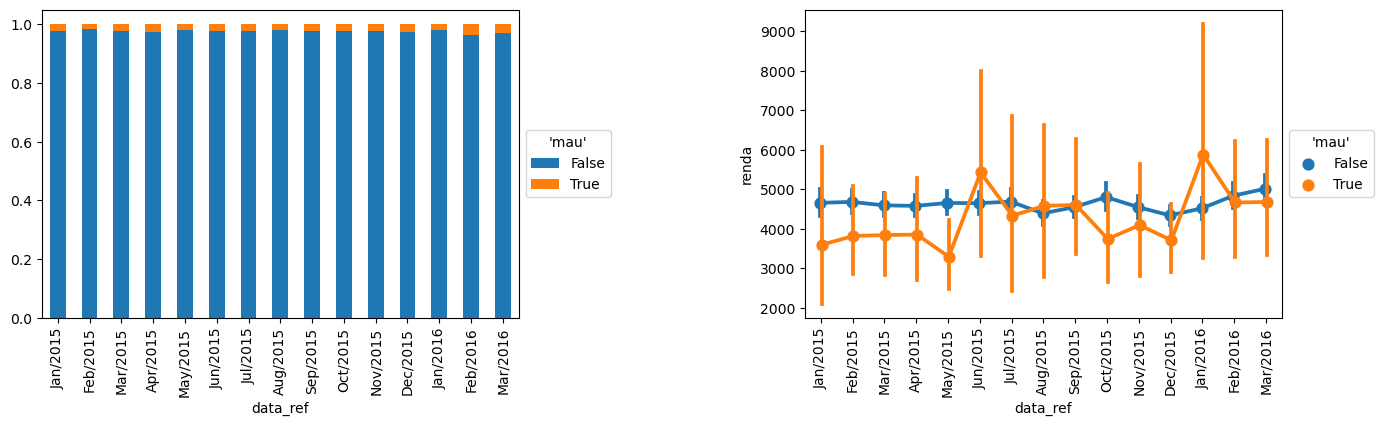

In [105]:
plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    tab = pd.crosstab(df['data_ref'],df[col])
    
    fig, axes = plt.subplots(1,2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    df_crosstab = pd.crosstab(index=df['data_ref'], columns=df[col], normalize='index')
    ax0 = df_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=90)
    axes[0].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    # perfis médios no tempo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, errorbar=('ci', 95), ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=90)
    axes[1].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    print(f'=============================================================================\n{tab.div(tab.sum(axis = 1), axis = 0)}\n')
    plt.show()

Um insight importante da análise de dados revela uma alteração significativa na variável **educacao**, que teve impacto em praticamente metade do período analisado. Durante este período, observou-se uma elevação na renda de abril a julho de 2015, seguida por uma queda em agosto e um pico em setembro do mesmo ano. Em outubro, houve outra queda e essa tendência se manteve até o final do período analisado. Com exceção dessa variável mencionada, todas as outras variáveis qualitativas demonstraram estabilidade em sua distribuição ao longo do tempo, sugerindo que podem ser utilizadas em um modelo analítico com confiança.